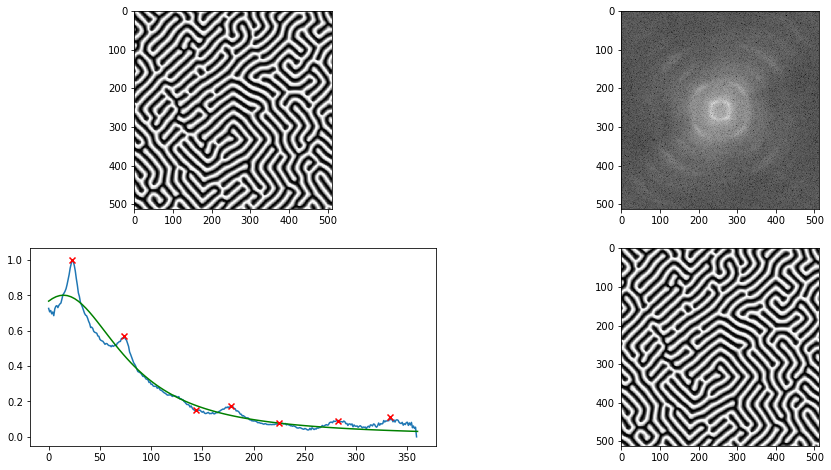

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import scipy.optimize as opt
import radialProfile

def lorentzian( x, x0, a, gam ):
    return a * gam**2 / ( gam**2 + ( x - x0 )**2)

def radial_profile(data):
    center = (np.round(data.shape[0]), np.round(data.shape[1]))
    y, x = np.indices((data.shape))
    r = np.sqrt((x - center[0])**2 + (y - center[1])**2)
    r = r.astype(int)

    tbin = np.bincount(r.ravel(), data.ravel())
    nr = np.bincount(r.ravel())
    radialprofile = tbin / nr
    return radialprofile

if __name__ == "__main__":
    img = cv2.imread('test4.png',cv2.IMREAD_GRAYSCALE)


    # Create the FFT of img
    freq_space = np.fft.fft2(img)
    # Shift the Fourier transform to the center
    fshift = np.fft.fftshift(freq_space)
    # Calculate the magnitude spectrum
    magnitude_spectrum = 20*np.log(np.abs(fshift))
    
    # Calculate the radial profile
    rad_prof = radialProfile.azimuthalAverage(magnitude_spectrum)
    rad_prof = rad_prof[~np.isnan(rad_prof)]
    rad_prof = (rad_prof-np.min(rad_prof))/(np.max(rad_prof)-np.min(rad_prof))
    
    fig, ax = plt.subplots(2,2, figsize=(16,8))

    peaks, props = scipy.signal.find_peaks(rad_prof, width=4)
    #print(peaks)
    
    X = range(rad_prof.shape[0])
    popt, pcov = opt.curve_fit(lorentzian, X, rad_prof, [peaks[0], 1, 1])

    ax[0,0].imshow(img, cmap='gray')
    ax[0,1].imshow(magnitude_spectrum, cmap='gray')
    
    ax[1,0].plot(X, rad_prof)
    ax[1,0].scatter(peaks, rad_prof[peaks], c='r', marker='x', zorder=3)
    x_param = np.linspace(0,len(X), 100)
    ax[1,0].plot(x_param, lorentzian(x_param, popt[0], popt[1], popt[2]), c='g')

    rev_im = np.fft.ifft2(freq_space)
    ax[1,1].imshow(np.abs(rev_im), cmap='gray')

    plt.show()

In [16]:
x = np.linspace(-5, 5, 101)
y = np.linspace(-5, 5, 101)
# full coordinate arrays
xx, yy = np.meshgrid(x, y)
zz = np.sqrt(xx**2 + yy**2)
xx.shape, yy.shape, zz.shape

((101, 101), (101, 101), (101, 101))

In [17]:
# sparse coordinate arrays
xs, ys = np.meshgrid(x, y, sparse=True)
zs = np.sqrt(xs**2 + ys**2)
xs.shape, ys.shape, zs.shape

((1, 101), (101, 1), (101, 101))

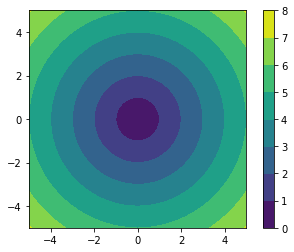

In [18]:
h = plt.contourf(x, y, zs)
plt.axis('scaled')
plt.colorbar()
plt.show()

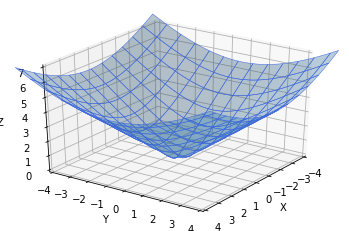

In [36]:
from mpl_toolkits.mplot3d import axes3d

ax = plt.figure().add_subplot(projection='3d')


ax.plot_surface(xs, ys, zs, edgecolor='royalblue', lw=0.5, rstride=8, cstride=8,
                alpha=0.3)

#for angle in range(0, 360):
ax.view_init(30, 35)

ax.contour(xx, yy, zs, zdir='z', offset=-100, cmap='coolwarm')
ax.contour(xx, yy, zs, zdir='x', offset=-40, cmap='coolwarm')
ax.contour(xx, yy, zs, zdir='y', offset=40, cmap='coolwarm')

ax.set(xlim=(-4, 4), ylim=(-4, 4), zlim=(0, 7),
       xlabel='X', ylabel='Y', zlabel='Z')

plt.show()
